In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('bank_data_set - bank_data_set.csv')

In [3]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
dataset.shape

(11162, 17)

In [7]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
data = dataset.sort_values(by='age')

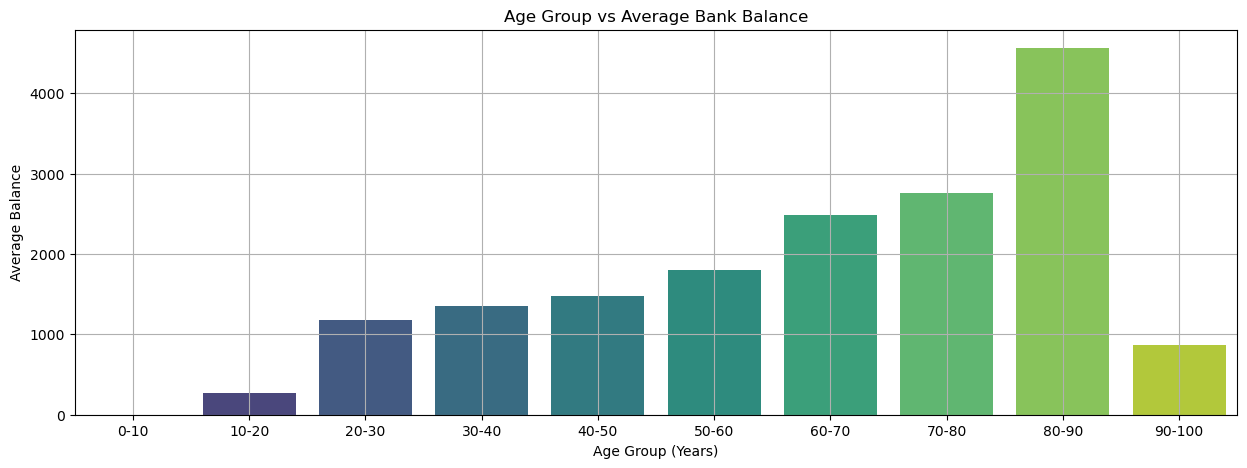

Each bar represents the average balance of customers within a 10-year age range.


In [22]:
bins = range(0, 101, 10)
labels = [f'{b}-{b+10}' for b in bins[:-1]]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

age_group_balance = data.groupby('age_group')['balance'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='balance', data=age_group_balance, palette='viridis')
plt.xlabel('Age Group (Years)')
plt.ylabel('Average Balance')
plt.title('Age Group vs Average Bank Balance')
plt.grid()
plt.show()

print("Each bar represents the average balance of customers within a 10-year age range.")


This graph shows how various job types relate to the average bank balance. It gives insight into which profession has customers with higher balances.


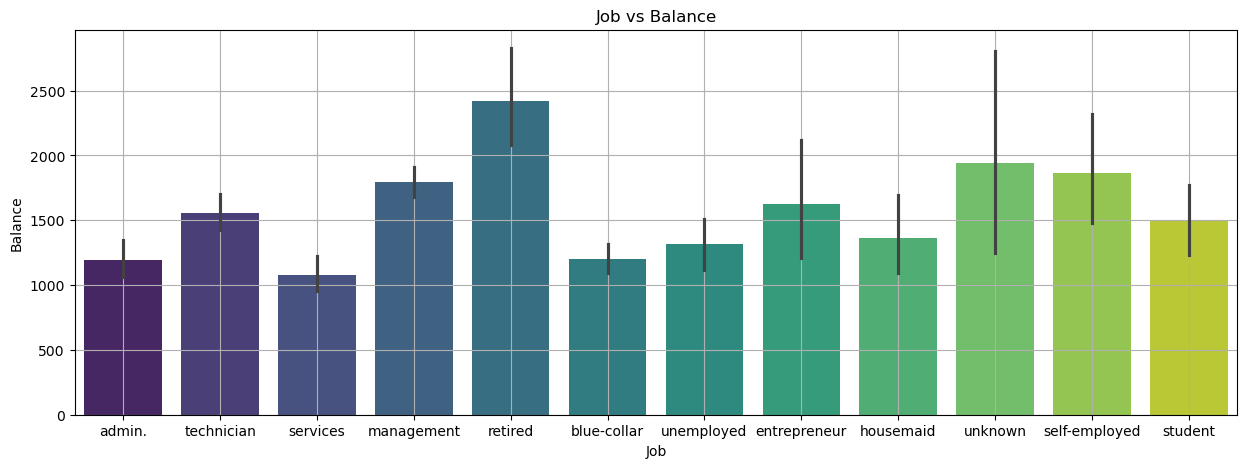

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=dataset['job'], y=dataset['balance'], palette='viridis')
plt.grid()
plt.xlabel('Job')
plt.ylabel('Balance')
plt.title('Job vs Balance')
print("This graph shows how various job types relate to the average bank balance. It gives insight into which profession has customers with higher balances.")
plt.show()

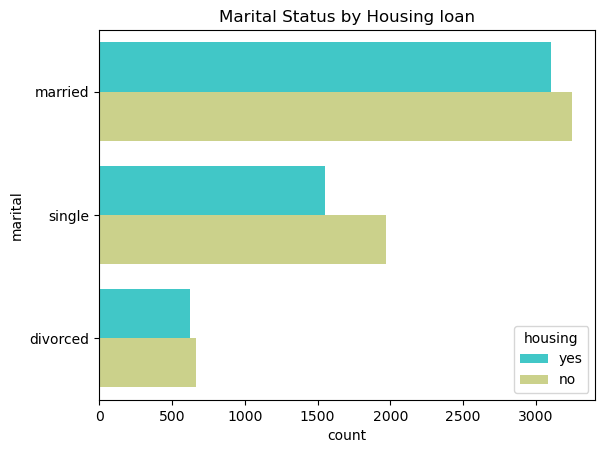

This horizontal bar graph displays the marital status of customers and whether they have a housing loan. It helps visualize which marital status group takes more housing loans.


In [14]:
sns.countplot(y='marital', hue='housing', data=dataset, palette='rainbow')
plt.title("Marital Status by Housing loan")
plt.show()
print("This horizontal bar graph displays the marital status of customers and whether they have a housing loan. It helps visualize which marital status group takes more housing loans.")

 Visualize the age spread of customers to see which age groups dominate the dataset.


Text(0.5, 1.0, 'Age Distribution of Customers')

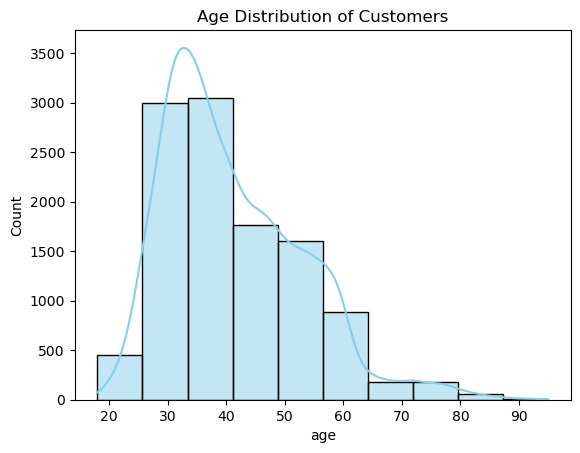

In [23]:
print(" Visualize the age spread of customers to see which age groups dominate the dataset.")
sns.histplot(dataset['age'],kde=True,bins=10,color='skyblue')
plt.title('Age Distribution of Customers')

 Identify which months people are most likely to deposit.


Text(0.5, 1.0, 'Month-wise Deposit Status')

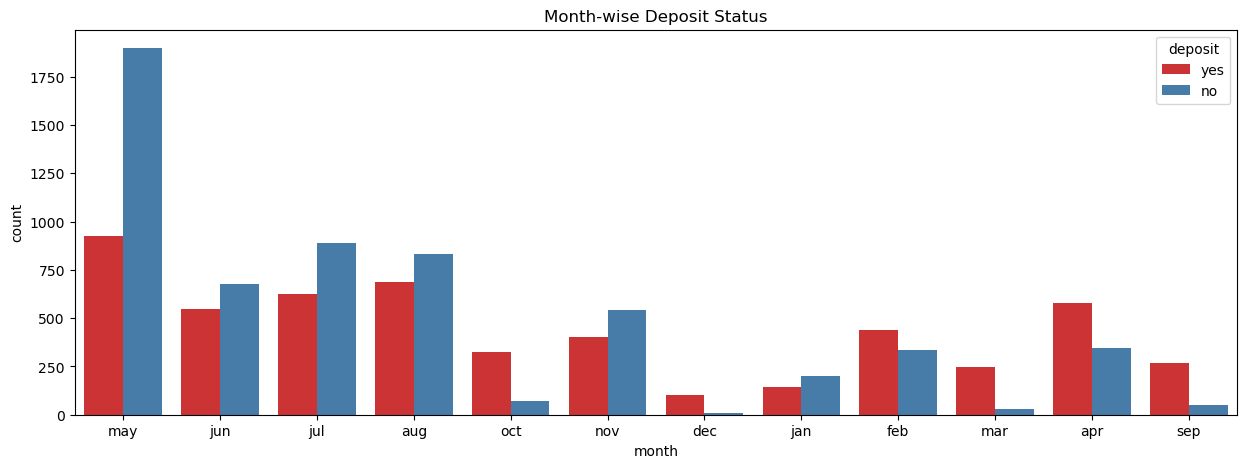

In [27]:
plt.figure(figsize=(15,5))
print(" Identify which months people are most likely to deposit.")
sns.countplot(x='month', hue='deposit', data=dataset, palette='Set1')
plt.title('Month-wise Deposit Status')

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset['deposit'])
dataset['deposit'] = le.transform(dataset['deposit'])

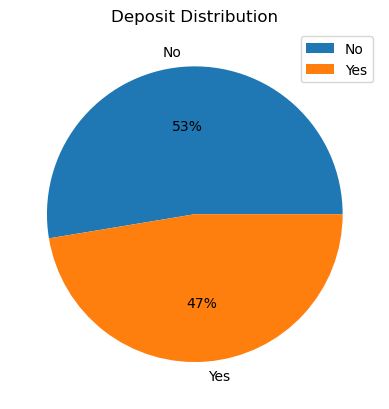

In this Deposit Distribution pie chat we saw:-
53% have not deposited
47% have deposited


In [29]:
plt.pie(dataset['deposit'].value_counts(), labels=['No', 'Yes'], autopct='%1.0f%%')
plt.title('Deposit Distribution')
plt.legend()
plt.show()
print("In this Deposit Distribution pie chat we saw:-")
print("53% have not deposited")
print("47% have deposited")

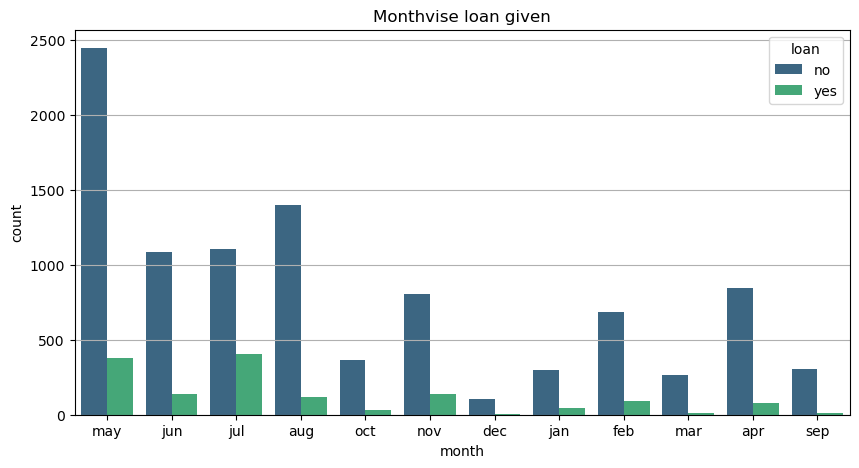

This graph displays how many loans were provided each month. It helps in understanding seasonal trends in loan distribution.


In [30]:
plt.figure(figsize=(10,5))
plt.grid()
sns.countplot(data = dataset,x='month',hue='loan',palette='viridis')
plt.title("Monthvise loan given")
plt.show()
print("This graph displays how many loans were provided each month. It helps in understanding seasonal trends in loan distribution.")

Check the relationship between customers having housing loans and personal loans.


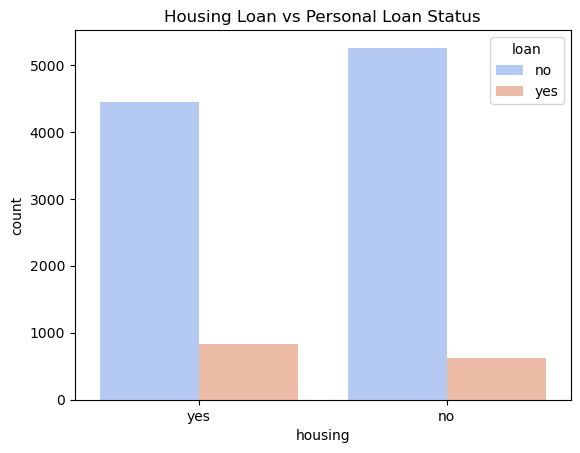

In [34]:
sns.countplot(x='housing', hue='loan', data=dataset, palette='coolwarm')
plt.title('Housing Loan vs Personal Loan Status')
print("Check the relationship between customers having housing loans and personal loans.")